# <font color=darkviolet><center> Implementação de Filtro Gaussiano
##  <font color=hotpink><center> Eloisa Maria, Giovana Martins, Maria Clara, Rafaela Luz
    
    

## <font color=lightgreen> Introdução
    
<font color=black> A finalidade deste caderno é demonstrar a implementação de um filtro Gaussiano, além de realizar uma comparação com um filtro linear. Para que seja possível a realização dessa tarefa é necessário que as imagens em que desejamos aplicar os filtros estejam na forma matricial, tendo isso em vista, implementaremos uma função que realiza esse processo.

## <font color=lightgreen> Bibliotecas
As bibliotecas a serem utilizadas são as seguintes: 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

## <font color=lightgreen> Convertendo imagens em matrizes
Para essa etapa do trabalho foi criada a função a seguir, ela recebe uma imagem em formato PPM, realiza a leitura do arquivo e armazena os dados em um `nparray`.
-  <font color=dakgreen>Por que usar esse formato de arquivo e o que ele significa?
    
    
<font color=black> PPM ou Mapa de Pixels Portátil (Portable Pixmap) é um formato de arquivo que armazena imagens coloridas no formato matricial. Um arquivo em PPM pode estar no modo texto('P3') ou modo binário('P6'), o modo texto armazena os números em ASCII(American Standard Code for Information Interchange) enquanto o binário armazena em bytes compactos,sendo mais eficiente. O modo em que o arquivo se encotra é descrito em sua primeira linha, a segunda linha armazena as dimensões da imagem. O arquivo em si comporta as informações de cor contidas em cada pixel da imagem individualmente, utilizando o sistema RGB. Na terceira linha do arquivo o maior valor desses pixels é armazenado, e em seguida os códigos RGB são dispostos em formato matricial seguindo a imagem, como um verdadeiro mapa.
<font color=black> Esse formato é muito útil por ser fácil de manipular e editar, atualmente ele é muito usado como formato intermediário em imagens pequenas para edições.  
-  <font color=dakgreen>Como a função funciona?
    

<font color=black> Na função o local de armazenamento da imagem é recebido como argumento, então, na linha 2, o código busca arquivo e abre para leitura, o parâmetro `'rb'` indica que ao abrir o arquivo deve ler em binário sem realizar modificações.A linha seguinte checa se o arquivo está no formato adequado para conversão, nesse caso um PPM P6(modo binário). A linha 5 armazena as dimensões da figura em duas variáveis e a linha 6 armazena a cor mais forte presente nela, já a linha 7 armazena os dados RGB da imagem em outra variável. A seguir é usada a função `frombuffer` da biblioteca `Numpy`, ela transforma um buffer de dados binários em array, esse array é reajustado e devolvido pela função.

In [5]:
def converte_matriz(local):
    with open(local, 'rb') as arquivo:
        cabeçalho=arquivo.readline().decode().strip()
        if cabeçalho=='P6':
            largura, altura=map(int,arquivo.readline().decode().strip().split())
            cor_mais_forte=int(arquivo.readline().decode().strip())
            dados_imagem=arquivo.read()
            imagem_array=np.frombuffer(dados_imagem, dtype=np.uint8)
            imagem_array = imagem_array.reshape((altura, largura, 3))
        
        else:
            raise ValueError("Formato de imagem não suportado. Para que o código seja executado utilize uma imagem em formato PPM.")
            
        return imagem_array

Dimensões da imagem: (153, 300, 3)


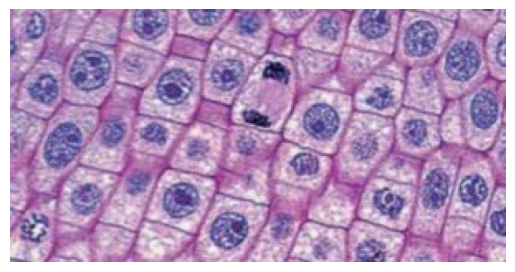

Imagem em forma de array: [[[155 107 157]
  [162 119 165]
  [179 144 186]
  ...
  [194 157 208]
  [197 160 212]
  [168 133 187]]

 [[167 119 169]
  [164 121 167]
  [169 134 176]
  ...
  [198 162 210]
  [193 156 208]
  [161 127 178]]

 [[175 127 177]
  [162 119 165]
  [157 122 162]
  ...
  [194 158 204]
  [180 144 192]
  [140 106 156]]

 ...

 [[161 142 164]
  [171 152 174]
  [178 158 185]
  ...
  [238 213 234]
  [231 201 227]
  [220 187 214]]

 [[132 107 136]
  [128 103 133]
  [119  94 126]
  ...
  [244 219 240]
  [229 199 223]
  [202 169 196]]

 [[165 138 171]
  [166 139 174]
  [156 128 166]
  ...
  [244 219 240]
  [205 175 201]
  [171 138 167]]]


In [6]:
imagem=converte_matriz('celulas4.ppm')
print("Dimensões da imagem:", imagem.shape)
plt.imshow(imagem)
plt.axis('off')
plt.show()
print("Imagem em forma de array:",imagem)

## <font color=lightgreen> Função de Aplicação de filtro
    
   Para entender o funcionamento dos filtros e realizar testes foi implementada uma função para aplicação de filtros.
    
-  <font color=dakgreen>Como a função funciona?    
    
  
    Essa função recebe como argumentos o array da imagem original e o array-semente do filtro desejado. O primeiro passo é criar uma matriz resultado onde serão armazenados os valores obtidos após a aplicação do filtro. A matriz resultado deve ser uma matriz nula com a mesma natureza que a matriz da imagem. Agora é possível aplicar o filtro, para cada uma das dimensões do array é realizada a convolução 2D das matrizes fornecidas utilizando a função `convolve2d` da biblioteca `scipy.signal`. O resultado da convolução é armazenado na matriz resultado já criada e retornado.
    
-  <font color=dakgreen>O que significam os parâmetros utilizados na convolução?
    
    
    A função `convolve2d` possui alguns parâmetros para retornar a convolução ideal para o seu caso. O parâmetro `mode` define o formato de devolução da convolução, no caso estamos utilizando o "same" que indica que desejamos que o resultado tenha o mesmo tamanho que a matriz de imagem fornecida. Já o parâmetro `boundary` diz respeito às bordas da imagem, as opcões nesse caso eram preencher os espaços fora da borda com zeros, interpretar a imagem como uma esfera(bordas contínuas) ou espelhar os valores da borda, a opção utilizada foi a última citada("symm").

In [7]:
def aplicar_filtro(imagem_array, semente):
    imagem_resultado=np.zeros_like(imagem_array)
    for i in range(3):
        imagem_resultado[:, :, i]=convolve2d(imagem_array[:, :, i], semente, mode='same', boundary='symm')
    return imagem_resultado

## <font color=lightgreen> Exemplo de aplicação de filtro linear
    
<font color=black> Para eluciadar o funcionamento do código foi feito um teste com um filtro linear de média.
    
-  <font color=dakgreen> Filtro de média:
    
    Um filtro linear de média é um filtro passa-baixas que funciona substituindo cada valor pela média dele próprio e de seus n vizinhos. Desfoca a imagem por conta dessa operação.
    

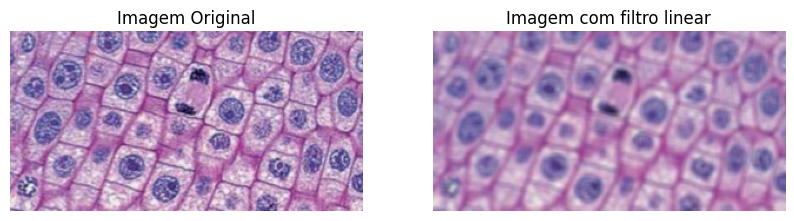

In [8]:
semente_exemplo=np.ones((5, 5)) / 25.0 
imagem_com_filtro=aplicar_filtro(imagem, semente_exemplo)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(imagem)
axes[0].set_title("Imagem Original")
axes[0].axis('off')

axes[1].imshow(imagem_com_filtro)
axes[1].set_title("Imagem com filtro linear")
axes[1].axis('off')

plt.show()

## <font color=lightgreen> Gerando e aplicando um Kernel Gaussiano
    
A criação de uma semente de fitro gaussiano é relativamente simples, sendo necessária apenas a transcrição da fórmula matemática na forma de código. Para gerar a semente somente são utilizados os parâmetros tamanho e sigma. Dentro da função o parâmetro tamanho é utilizado para calcular o X e o Y e então a semente é definida a partir da fórmula:
    
$$
G(x, y) = \frac{1}{2\pi\sigma^2} \exp\left(-\frac{x^2 + y^2}{2\sigma^2}\right)
$$

-  <font color=dakgreen> Filtro gaussiano:
    
   É um filtro passa-baixa que realiza uma média ponderada dos pixels mais próximos a cada pixel alterado, acrescentando maior peso para o próprio pixel e os mais próximos dele de acordo com a fórmula da função gaussiana (acima). Graças a essa pequena alteração, o desfoque da imagem filtrada é menor que para o filtro da média.


In [9]:
def gerar_semente_gaussiana(tamanho, sigma):
    tamanho_semente=tamanho//2
    x=np.linspace(-tamanho_semente, tamanho_semente, tamanho)
    y=np.linspace(-tamanho_semente, tamanho_semente, tamanho)
    x, y=np.meshgrid(x, y)
    semente=np.exp(-(x**2+y**2)/(2*sigma**2))
    semente=semente/np.sum(semente)
    return semente


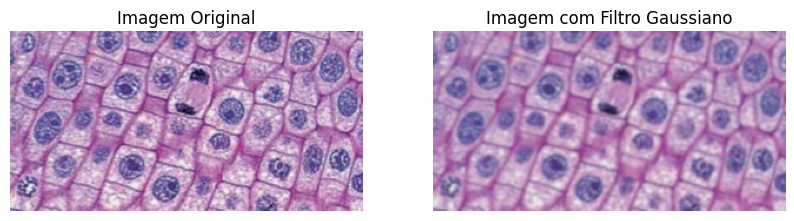

In [12]:
semente_gaussiana_exemplo=gerar_semente_gaussiana(25, 1.0)
imagem_com_filtro_g=aplicar_filtro(imagem, semente_gaussiana_exemplo)
fig, axes=plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(imagem)
axes[0].set_title("Imagem Original")
axes[0].axis('off')

axes[1].imshow(imagem_com_filtro_g)
axes[1].set_title("Imagem com Filtro Gaussiano")
axes[1].axis('off')

plt.show()

## <font color=lightgreen> Comparando os filtros 

No espaço abaixo foram plotadas simultaneamente as imagens com ambos os filtros para melhor visualização das diferenças observadas nos resultados dos processos de tratamento de imagem. Observou-se o desfoque mais acentuado conforme esperado para o filtro da média.

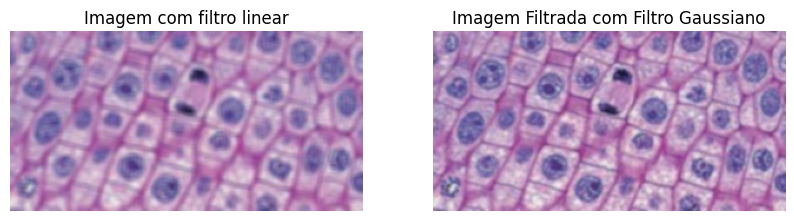

In [13]:
fig, axes=plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(imagem_com_filtro)
axes[0].set_title("Imagem com filtro linear")
axes[0].axis('off')

axes[1].imshow(imagem_com_filtro_g)
axes[1].set_title("Imagem Filtrada com Filtro Gaussiano")
axes[1].axis('off')

plt.show()

## <font color=lightgreen> Referências
https://tecnologiaemmarketingdigital.com/arquivo-ppm/
    
    
https://chatgpt.com/
    
    
https://nca.ufma.br/~geraldo/vc/4.filtros.pdf